In [2]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Import the dataset using the pandas library
raw_data = pd.read_csv('Dummies.csv')

In [4]:
# Display the imported data
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [5]:
# Create a copy of the dataset in a new variable 
data = raw_data.copy()

In [6]:
# Map the categorical data in the table to numerical data
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [7]:
# Display the overwritten table
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [8]:
# Descriptive Statistics
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


The mean is less than 0.5, so there are more 0s than 1s. 46% of the students have attended more than 75% of the lessons.

## Regression

In [12]:
# Name the axes
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [13]:
# Obtain the OLS Regression Results Table 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           2.19e-15
Time:                        15:53:11   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Overall model is significant. SAT score and the Dummy are significant. The adj. R squared is 0.555, which is a huge improvement from the previous table, without attendance. 

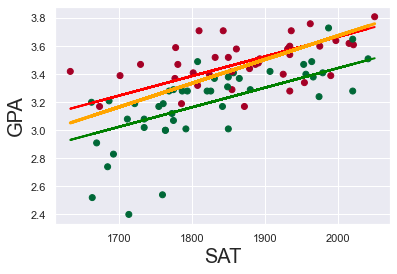

In [20]:
plt.scatter(data['SAT'], y, c = data['Attendance'], cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
yhat = 0.275 + 0.0017 * data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw=2, c = 'Green', label = 'regression line1')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c = 'Red', label = 'regression line2')
fig = plt.plot(data['SAT'], yhat, lw=3, c = 'Orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()